In [1]:
#load the dataset
from sklearn.datasets import fetch_openml

# Load the Boston Housing Dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import pandas as pd
data=pd.DataFrame(boston.data, columns=boston.feature_names)
target=pd.Series(boston.target, name='MEDV')

#Obtain the dataframe
df= pd.concat([data, target], axis=1)

**Data Exploration:**

In [3]:
print(df.shape)

(506, 14)


In [4]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
205,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277.0,18.6,396.90,10.87,22.6
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92,8.5
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64,16.1
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666.0,20.2,395.28,7.01,25.0
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27,13.4
338,0.03306,0.0,5.19,0,0.515,6.059,37.3,4.8122,5,224.0,20.2,396.14,8.51,20.6
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
276,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,33.2


In [5]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Preprocessing and EDA:**

In [8]:
#Missing value check
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Outlier detection

# Define the list of numerical features
num_feat = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Convert the selected columns to a numerical data type
df[num_feat] = df[num_feat].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after converting to numeric
df.dropna(subset=num_feat, inplace=True)

# Calculate the IQR for each column
Q1 = df[num_feat].quantile(0.25)
Q3 = df[num_feat].quantile(0.75)
IQR = Q3 - Q1

# Define the thresholds for identifying outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count the number of outliers in each column
outliers_count = ((df[num_feat] < lower_threshold) | (df[num_feat] > upper_threshold)).sum()

# Display the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in CRIM: 66
Number of outliers in ZN: 68
Number of outliers in INDUS: 0
Number of outliers in CHAS: 35
Number of outliers in NOX: 0
Number of outliers in RM: 30
Number of outliers in AGE: 0
Number of outliers in DIS: 5
Number of outliers in RAD: 0
Number of outliers in TAX: 0
Number of outliers in PTRATIO: 15
Number of outliers in B: 77
Number of outliers in LSTAT: 7


Most of the columns contain outliers.

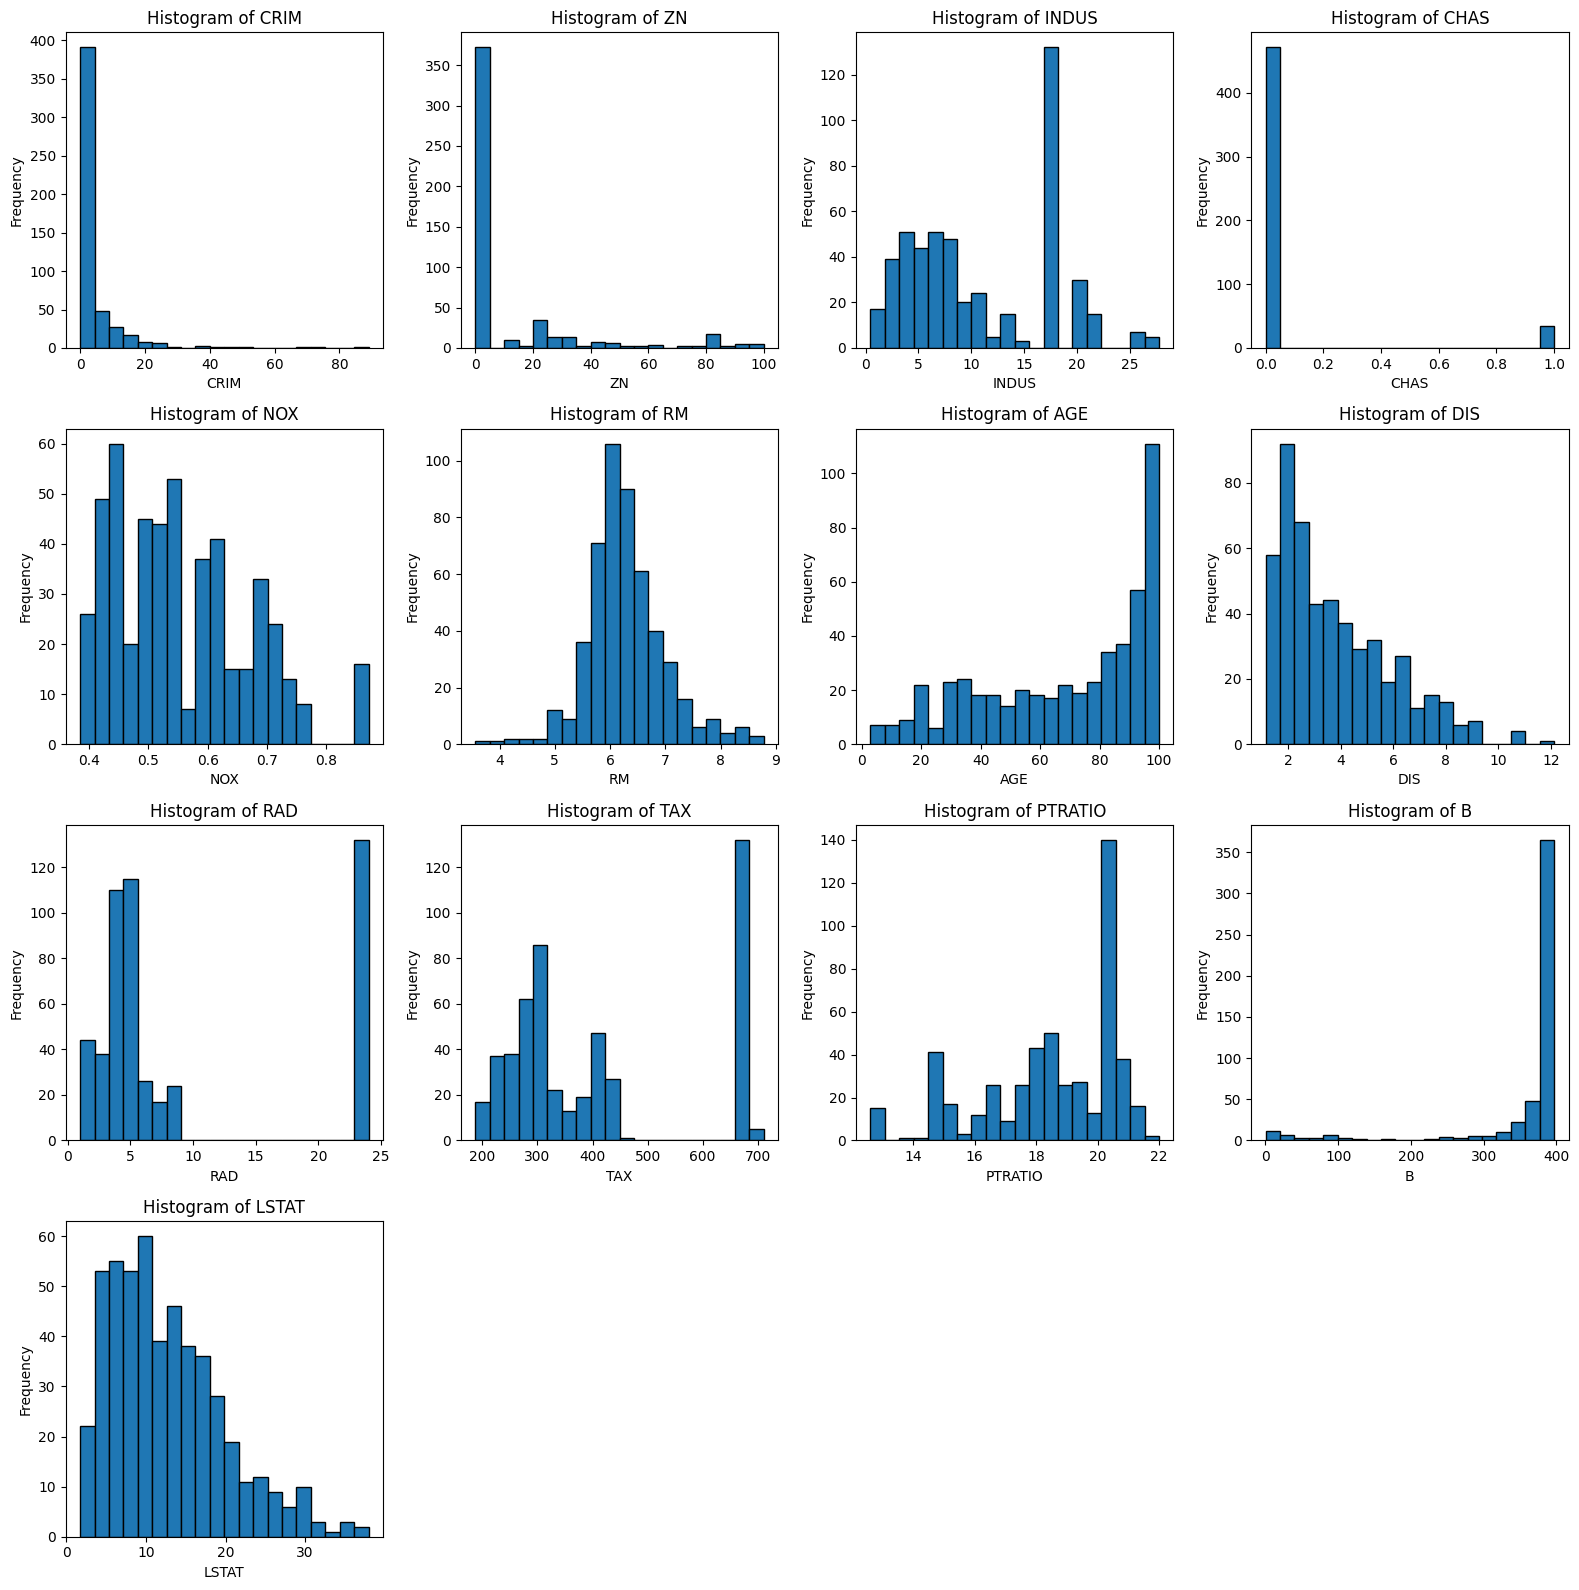

In [10]:
import matplotlib.pyplot as plt


# Select numerical features for which you want to plot histograms
num_feat = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Set up subplots
num_features = len(num_feat)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Iterate through numerical features and plot histograms
for i, feature in enumerate(num_feat):
    ax = axes[i // num_cols, i % num_cols]
    df[feature].plot(kind='hist', ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_features, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

 CRIM, ZN and B  contain lot of outliers. CHAS has lot of values which are 0s. So we will be dropping it.



In [11]:
df.drop(['CHAS'],axis=1,inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
#Outliers treatment using Winsorization
from scipy.stats.mstats import winsorize
import numpy as np

# Function to treat outliers
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1], inclusive=(True, True))

    return dataframe

# Apply the function to your DataFrame
df = treat_outliers(df)

# Display the updated statistics after Winsorization
print("Descriptive Statistics after Winsorization:")
df.describe()

Descriptive Statistics after Winsorization:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.422883,8.522727,10.934387,0.548480,6.255480,68.795652,3.662303,9.588933,408.897233,18.492095,359.427372,12.220138,21.819368
std,3.738429,15.441906,6.416626,0.101417,0.523654,27.379172,1.794047,8.670480,166.460239,2.017237,81.478208,6.066184,7.060535
min,0.027630,0.000000,2.180000,0.409000,5.304000,17.700000,1.460800,2.000000,222.000000,14.700000,83.450000,3.700000,10.200000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,10.834200,45.000000,19.580000,0.713000,7.155000,98.800000,6.818500,24.000000,666.000000,20.900000,396.900000,23.090000,34.900000


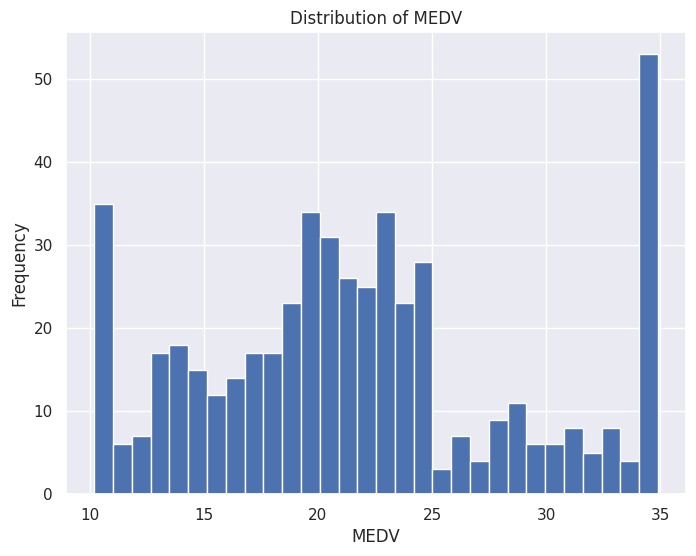

In [13]:
import seaborn as sns
sns.set()
#Histogram of Target variable
plt.figure(figsize=(8, 6))
plt.hist(df['MEDV'], bins=30)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

In [14]:
#Data normalization
from sklearn.preprocessing import StandardScaler

#Select the numerical features
num_feat=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#Standardize the features
scaler=StandardScaler()
df[num_feat]=scaler.fit_transform(df[num_feat])

**Feature Selection:**
Selecting best 5 features for model building.

In [15]:
#Feature Selection using Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assuming df contains both features and target variable
X = df.drop('MEDV', axis=1)  # Exclude the target column
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select features based on feature importance
sfm = SelectFromModel(rf, threshold=0.1)
sfm.fit(X_train, y_train)

# Get feature importance scores from the Random Forest model
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features based on importance scores
sorted_features = feature_importances.sort_values(ascending=False)

# Select the top 5 features
selected_top_features = sorted_features.index[:5]

# Print selected features and their importance scores
print("Selected Top Features:", selected_top_features)
print("Feature Importance Scores:")
print(feature_importances[selected_top_features])


Selected Top Features: Index(['LSTAT', 'RM', 'CRIM', 'DIS', 'NOX'], dtype='object')
Feature Importance Scores:
LSTAT    0.574996
RM       0.257226
CRIM     0.039587
DIS      0.026771
NOX      0.020402
dtype: float64


In [16]:
pip install -q -U keras-tuner

**Building the Neural Network Model:**

In [17]:
#Making the training and testing sets
X_train_selected= X_train[selected_top_features]
X_test_selected=X_test[selected_top_features]

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

Use Keras Tuner to get the best hyperparameters:

In [19]:
# Define the model-building function
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=64, max_value=128, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu', input_dim=len(selected_top_features)))

    # Tune the number of layers in the model
    hp_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
    for _ in range(hp_layers):
        model.add(layers.Dense(units=hp_units, activation='relu'))

    model.add(layers.Dense(1))  # Output layer for regression task

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])),
                  loss='mean_squared_error', metrics=['mae'])

    return model

# Instantiate the tuner
tuner = kt.tuners.RandomSearch(build_model,
                                objective='val_loss',
                                max_trials=10)



# Display search space summary
tuner.search_space_summary()

# Perform hyperparameter search
tuner.search(X_train_selected, y_train, epochs=100, validation_data=(X_test_selected, y_test))

# Get the best hyperparameters
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_hps = best_trial.hyperparameters.values
print(f"Best Hyperparameters: {best_hps}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_trial.hyperparameters)

# Train the model with the best hyperparameters
best_model.fit(X_train_selected, y_train, epochs=100, batch_size=32, validation_data=(X_test_selected, y_test))


Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
Best Hyperparameters: {'units': 64, 'num_layers': 1, 'learning_rate': 0.01}
Epoch 1/100
13/13 [==============================] - 2s 18ms/step - loss: 372.6168 - mae: 17.5765 - val_loss: 83.8846 - val_mae: 7.8307
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 63.6814 - mae: 6.5076 - val_loss: 23.8824 - val_mae: 3.7542
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 25.6306 - mae: 3.8869 - val_loss: 18.3480 - val_mae: 3.2599
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 17.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Best hyperparameters
units = 64
num_layers = 1
learning_rate = 0.01


#Model Building
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=units, input_dim=len(selected_top_features), activation='relu'))

# Additional hidden layers with the best number of units
for _ in range(num_layers-1):
    model.add(Dense(units=units, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model with the best learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')


Epoch 1/100
13/13 - 2s - loss: 459.3325 - val_loss: 332.4130 - 2s/epoch - 125ms/step
Epoch 2/100
13/13 - 0s - loss: 271.8355 - val_loss: 156.5184 - 147ms/epoch - 11ms/step
Epoch 3/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 - 0s - loss: 116.4794 - val_loss: 74.9244 - 164ms/epoch - 13ms/step
Epoch 4/100
13/13 - 0s - loss: 67.7061 - val_loss: 45.2951 - 140ms/epoch - 11ms/step
Epoch 5/100
13/13 - 0s - loss: 38.7608 - val_loss: 33.3646 - 131ms/epoch - 10ms/step
Epoch 6/100
13/13 - 0s - loss: 27.1002 - val_loss: 24.1432 - 130ms/epoch - 10ms/step
Epoch 7/100
13/13 - 0s - loss: 21.0033 - val_loss: 21.2533 - 117ms/epoch - 9ms/step
Epoch 8/100
13/13 - 0s - loss: 18.9258 - val_loss: 19.3502 - 140ms/epoch - 11ms/step
Epoch 9/100
13/13 - 0s - loss: 17.5195 - val_loss: 17.9117 - 127ms/epoch - 10ms/step
Epoch 10/100
13/13 - 0s - loss: 16.3545 - val_loss: 16.5995 - 145ms/epoch - 11ms/step
Epoch 11/100
13/13 - 0s - loss: 15.2783 - val_loss: 15.4769 - 152ms/epoch - 12ms/step
Epoch 12/100
13/13 - 0s - loss: 14.4916 - val_loss: 14.3663 - 139ms/epoch - 11ms/step
Epoch 13/100
13/13 - 0s - loss: 13.6241 - val_loss: 13.5801 - 120ms/epoch - 9ms/step
Epoch 14/100
13/13 - 0s - loss: 12.8847 - val_loss: 12.7863 - 152ms/epoch 

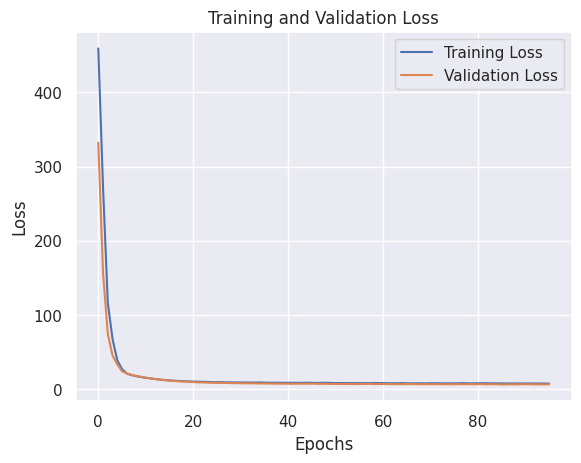

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10,  restore_best_weights=True, mode='auto')

# Define ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with early stopping and model checkpoint
history = model.fit(X_train_selected, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test_selected, y_test),
                    callbacks=[early_stopping, checkpoint], verbose=2)

# Load the best model for evaluation
best_model = load_model('best_model.h5')
test_results = best_model.evaluate(X_test_selected, y_test)
print("Test Loss:", test_results)
print("Test MAE:", test_results)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


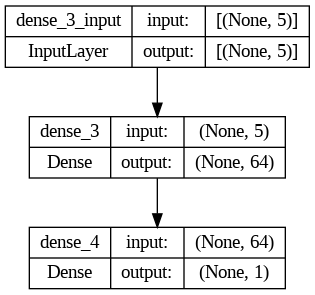

In [22]:
# Import necessary libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Visualize the architecture of the neural network
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [23]:
from tensorflow.keras.models import load_model

# Assuming the best model was saved as 'best_model.h5'
best_model = load_model('best_model.h5')

# Make predictions using the loaded model
y_pred = best_model.predict(X_test_selected)



4/4 [==============================] - 0s 5ms/step


In [24]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  6.342593468451425
Mean Absolute Error (MAE):  1.9145290973139744
R-squared (R2):  0.8507214269115
